### CS559 - Homework #4

**Author**: Sid Bhatia

**Date**: October 22nd, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. In Suk Jang

In [1]:
import pandas as pd

hitters_data_fresh = pd.read_csv('./Hitters.csv')

hitters_data_fresh.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

clean_data_fresh = hitters_data_fresh.dropna(subset=['Salary'])

features_clean_fresh = clean_data_fresh.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
target_clean_fresh = clean_data_fresh['Salary']

X_train_fresh, X_test_fresh, y_train_fresh, y_test_fresh = train_test_split(features_clean_fresh, target_clean_fresh, test_size=0.2, random_state=42)

for dataset in [X_train_fresh, X_test_fresh]:
    dataset['Hits_per_AtBat'] = dataset['Hits'] / dataset['AtBat']
    dataset['HmRun_per_AtBat'] = dataset['HmRun'] / dataset['AtBat']
    dataset['Runs_per_AtBat'] = dataset['Runs'] / dataset['AtBat']
    dataset['RBI_per_AtBat'] = dataset['RBI'] / dataset['AtBat']
    dataset['Efficiency'] = dataset['Years'] / (dataset['CHits'] + 1)

scaler_fresh = StandardScaler()
X_train_scaled_fresh = scaler_fresh.fit_transform(X_train_fresh)
X_test_scaled_fresh = scaler_fresh.transform(X_test_fresh)

X_train_scaled_fresh.shape, X_test_scaled_fresh.shape, y_train_fresh.shape, y_test_fresh.shape

((210, 21), (53, 21), (210,), (53,))

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import time

model_performance_fresh = {}

def evaluate_model_fresh(model, model_name):
    start_time = time.time()
    model.fit(X_train_scaled_fresh, y_train_fresh)
    train_time = time.time() - start_time

    y_pred_train = model.predict(X_train_scaled_fresh)
    y_pred_test = model.predict(X_test_scaled_fresh)
    train_mse = mean_squared_error(y_train_fresh, y_pred_train)
    test_mse = mean_squared_error(y_test_fresh, y_pred_test)
    test_r2 = r2_score(y_test_fresh, y_pred_test)

    model_performance_fresh[model_name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "R2 Score": test_r2,
        "Training Time": train_time
    }
    return model_performance_fresh[model_name]

# 1. Neural Network (MLPRegressor)
mlp_fresh = MLPRegressor(random_state=42, max_iter=1000)
evaluate_model_fresh(mlp_fresh, "Neural Network")

# 2. kNN (KNeighborsRegressor)
knn_fresh = KNeighborsRegressor()
evaluate_model_fresh(knn_fresh, "k-Nearest Neighbors")

# 3. Kernel Ridge Regression
krr_fresh = KernelRidge()
evaluate_model_fresh(krr_fresh, "Kernel Ridge Regression")

# 4. Support Vector Machines (SVR)
svr_fresh = SVR()
evaluate_model_fresh(svr_fresh, "Support Vector Machines")

performance_df_fresh = pd.DataFrame(model_performance_fresh).T

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
def track_time_and_mse(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    model.fit(X_train, y_train)
    
    end_time = time.time()
    
    training_time = end_time - start_time
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    return train_mse, test_mse, training_time

In [5]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 100)]

train_mse_nn = []
test_mse_nn = []
training_times_nn = []

for config in hidden_layer_configs:
    mlp = MLPRegressor(hidden_layer_sizes=config, random_state=42, max_iter=1000)
    train_mse, test_mse, training_time = track_time_and_mse(mlp, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
    
    train_mse_nn.append(train_mse)
    test_mse_nn.append(test_mse)
    training_times_nn.append(training_time)

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
print(train_mse_nn)
print(test_mse_nn)
print(training_times_nn)

[124078.85865320405, 103286.94860249457, 87561.48926001345, 94126.39318304331]
[115242.61927797271, 105440.24966965982, 106731.8380703591, 103892.508403658]
[0.6694128513336182, 1.3337056636810303, 1.109924554824829, 0.7654738426208496]


In [7]:
n_neighbors_values = [3, 5, 7, 9]

train_mse_knn = []
test_mse_knn = []
training_times_knn = []

for n in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    train_mse, test_mse, training_time = track_time_and_mse(knn, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
    
    train_mse_knn.append(train_mse)
    test_mse_knn.append(test_mse)
    training_times_knn.append(training_time)

In [8]:
print(train_mse_knn)
print(test_mse_knn)
print(training_times_knn)

[52451.951867892596, 64357.45573900057, 71355.61144118241, 79314.30074821727]
[155548.28750592662, 139219.2750588687, 136461.91117297346, 129032.98233815654]
[0.0, 0.0, 0.0, 0.0]


In [9]:
kernel_alpha_combinations = [
    ('linear', 1),
    ('rbf', 1),
    ('poly', 0.1),
    ('linear', 10)
]

train_mse_krr = []
test_mse_krr = []
training_times_krr = []

for kernel, alpha in kernel_alpha_combinations:
    krr = KernelRidge(kernel=kernel, alpha=alpha)
    train_mse, test_mse, training_time = track_time_and_mse(krr, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
    
    train_mse_krr.append(train_mse)
    test_mse_krr.append(test_mse)
    training_times_krr.append(training_time)

In [10]:
print(train_mse_krr)
print(test_mse_krr)
print(training_times_krr)

[383875.5405076623, 46361.39036527733, 6495.815085053783, 388548.2454401056]
[372747.4565284351, 136239.70000686505, 190058.33542204244, 395994.9742031281]
[0.002999544143676758, 0.0012488365173339844, 0.007298946380615234, 0.0020058155059814453]


In [11]:
from sklearn.svm import SVR

kernel_C_combinations = [
    ('linear', 1),
    ('rbf', 1),
    ('poly', 0.1),
    ('linear', 10)
]

train_mse_svr = []
test_mse_svr = []
training_times_svr = []

for kernel, C in kernel_C_combinations:
    svr = SVR(kernel=kernel, C=C)
    train_mse, test_mse, training_time = track_time_and_mse(svr, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
    
    train_mse_svr.append(train_mse)
    test_mse_svr.append(test_mse)
    training_times_svr.append(training_time)

In [12]:
print(train_mse_svr)
print(test_mse_svr)

[111570.67755348833, 212562.5477430355, 218561.6317457682, 102147.7883626779]
[167543.2440752907, 180677.18733218094, 185227.9550822035, 166579.43191619698]


In [13]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model

# 1. Neural Networks (MLPRegressor)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive']
}

# 2. k-Nearest Neighbors (KNN)
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# 3. Kernel Ridge Regression (KRR)
krr_param_grid = {
    'alpha': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# 4. Support Vector Machines (SVR)
svr_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Hyperparameter tuning using GridSearchCV for each model

# 1. MLP Regressor
mlp_grid_search = GridSearchCV(MLPRegressor(random_state=42, max_iter=1000), mlp_param_grid, cv=5, scoring='r2', n_jobs=-1)
mlp_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

# 2. kNN Regressor
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
knn_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

# 3. Kernel Ridge Regression
krr_grid_search = GridSearchCV(KernelRidge(), krr_param_grid, cv=5, scoring='r2', n_jobs=-1)
krr_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

# 4. SVR
svr_grid_search = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='r2', n_jobs=-1)
svr_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

best_params_mlp = mlp_grid_search.best_params_
best_params_knn = knn_grid_search.best_params_
best_params_krr = krr_grid_search.best_params_
best_params_svr = svr_grid_search.best_params_

best_scores = {
    'Neural Network': mlp_grid_search.best_score_,
    'k-Nearest Neighbors': knn_grid_search.best_score_,
    'Kernel Ridge Regression': krr_grid_search.best_score_,
    'Support Vector Machines': svr_grid_search.best_score_
}

best_params_mlp, best_params_knn, best_params_krr, best_params_svr, best_scores

({'hidden_layer_sizes': (100, 100),
  'learning_rate': 'constant',
  'solver': 'adam'},
 {'n_neighbors': 9},
 {'alpha': 1, 'kernel': 'poly'},
 {'C': 1, 'kernel': 'linear'},
 {'Neural Network': 0.47839274367744783,
  'k-Nearest Neighbors': 0.5107530361256476,
  'Kernel Ridge Regression': 0.6440699426899754,
  'Support Vector Machines': 0.4051168391317551})

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Retrain the models using the best parameters

# 1. Neural Network
mlp_best = MLPRegressor(**best_params_mlp, random_state=42, max_iter=1000)
evaluate_model_fresh(mlp_best, "Neural Network")

# 2. k-Nearest Neighbors
knn_best = KNeighborsRegressor(**best_params_knn)
evaluate_model_fresh(knn_best, "k-Nearest Neighbors")

# 3. Kernel Ridge Regression
krr_best = KernelRidge(**best_params_krr)
evaluate_model_fresh(krr_best, "Kernel Ridge Regression")

# 4. Support Vector Machines
svr_best = SVR(**best_params_svr)
evaluate_model_fresh(svr_best, "Support Vector Machines")

performance_df_best = pd.DataFrame(model_performance_fresh).T

performance_df_best

,Train MSE,Test MSE,R2 Score,Training Time
Neural Network,94126.393183,103892.508404,0.425602,0.981883
k-Nearest Neighbors,79314.300748,129032.982338,0.286606,0.000000
Kernel Ridge Regression,19880.860214,179261.407679,0.008905,0.008190
Support Vector Machines,111570.677553,167543.244075,0.073692,0.000000


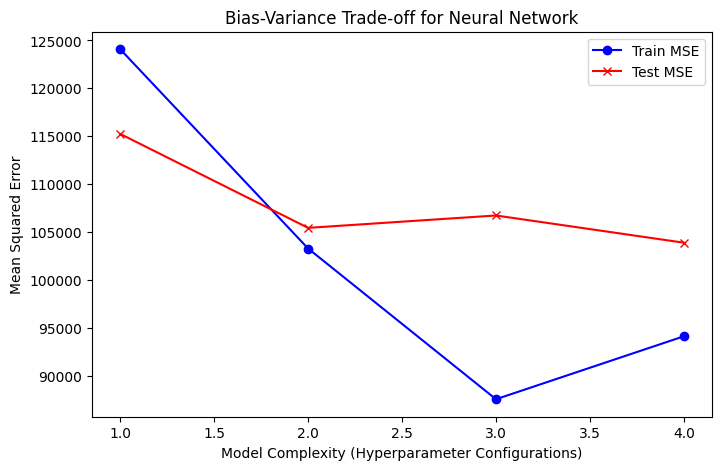

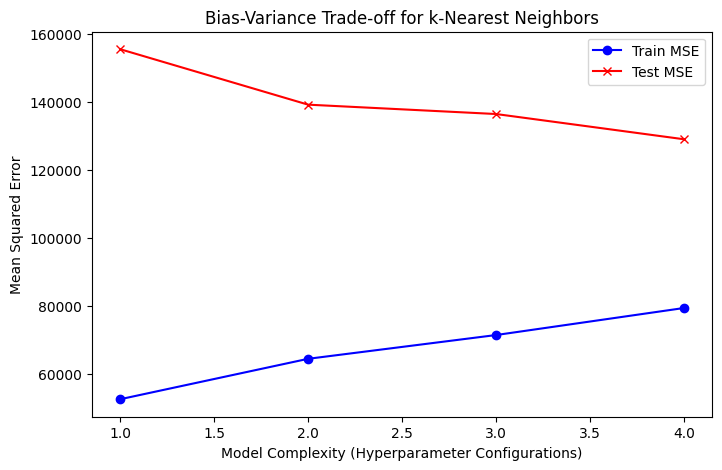

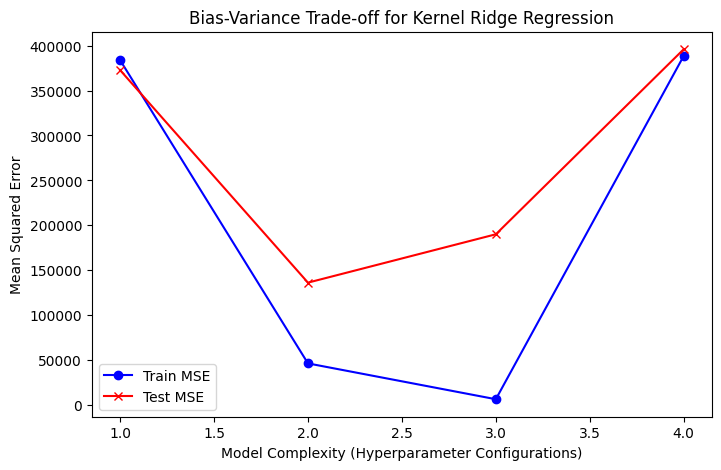

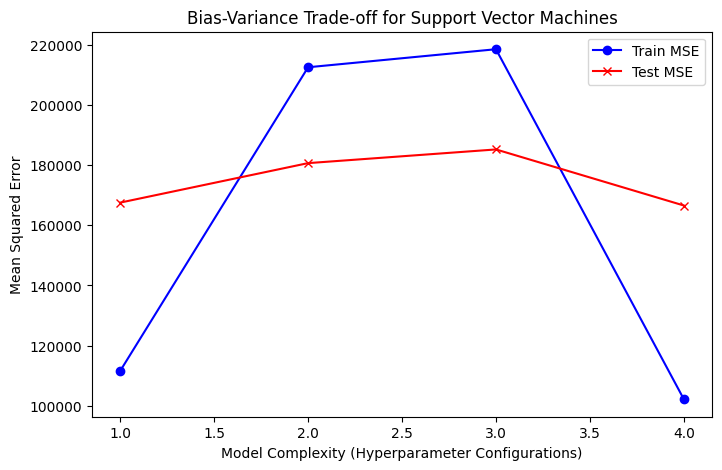

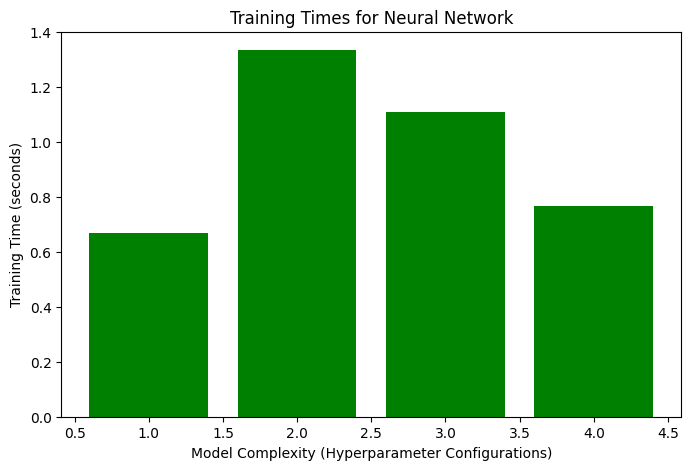

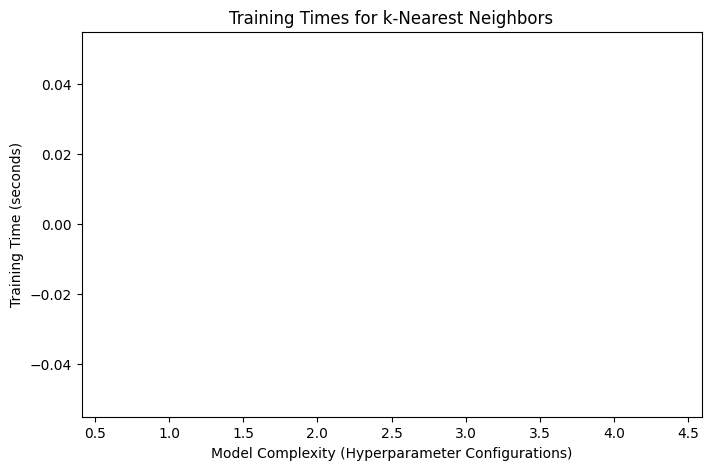

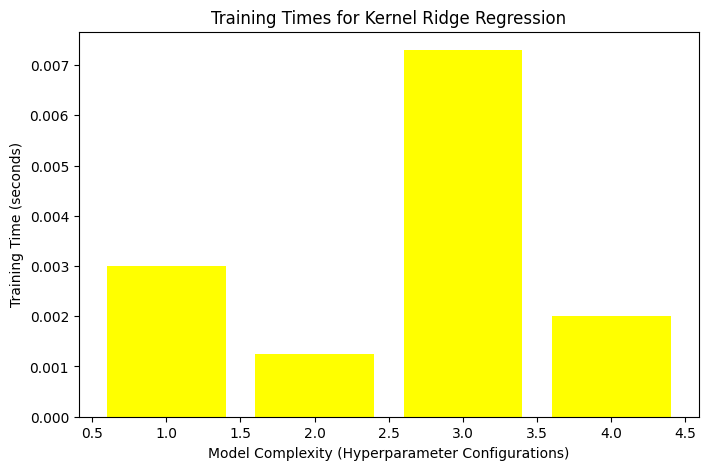

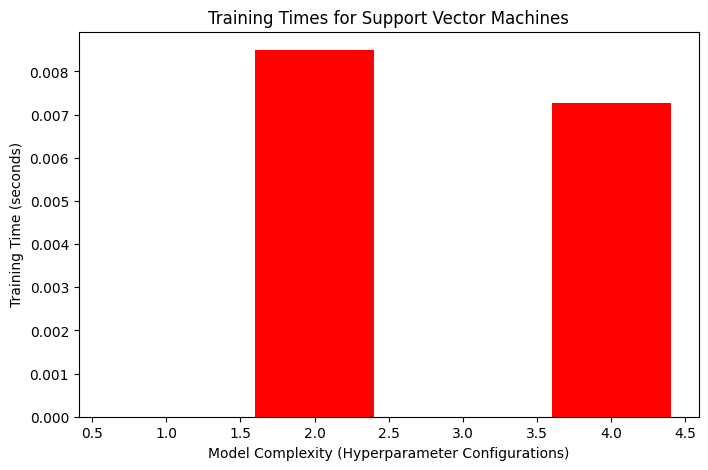

In [15]:
import matplotlib.pyplot as plt

def plot_bias_variance(train_mses, test_mses, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_mses) + 1), train_mses, label='Train MSE', marker='o', color='blue')
    plt.plot(range(1, len(test_mses) + 1), test_mses, label='Test MSE', marker='x', color='red')
    plt.title(f"Bias-Variance Trade-off for {model_name}")
    plt.xlabel('Model Complexity (Hyperparameter Configurations)')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

def plot_training_times(training_times, model_name, color):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(training_times) + 1), training_times, color = color)
    plt.title(f"Training Times for {model_name}")
    plt.xlabel('Model Complexity (Hyperparameter Configurations)')
    plt.ylabel('Training Time (seconds)')
    plt.show()

plot_bias_variance(train_mse_nn, test_mse_nn, "Neural Network")
plot_bias_variance(train_mse_knn, test_mse_knn, "k-Nearest Neighbors")
plot_bias_variance(train_mse_krr, test_mse_krr, "Kernel Ridge Regression")
plot_bias_variance(train_mse_svr, test_mse_svr, "Support Vector Machines")

plot_training_times(training_times_nn, "Neural Network", color = 'green')
plot_training_times(training_times_knn, "k-Nearest Neighbors", color = 'blue')
plot_training_times(training_times_krr, "Kernel Ridge Regression", color = 'yellow')
plot_training_times(training_times_svr, "Support Vector Machines", color = 'red')

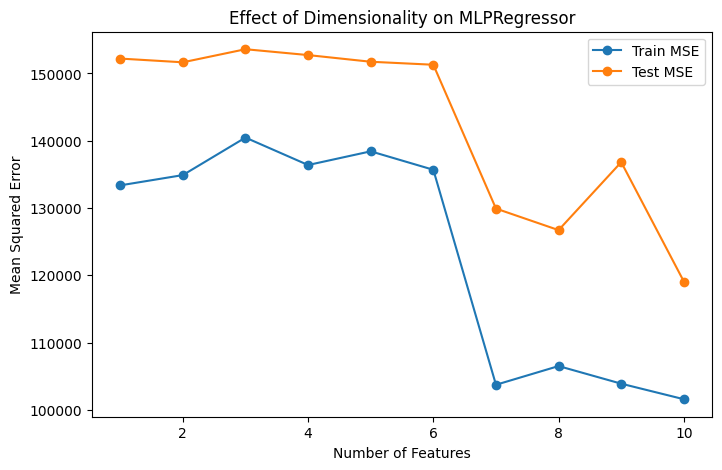

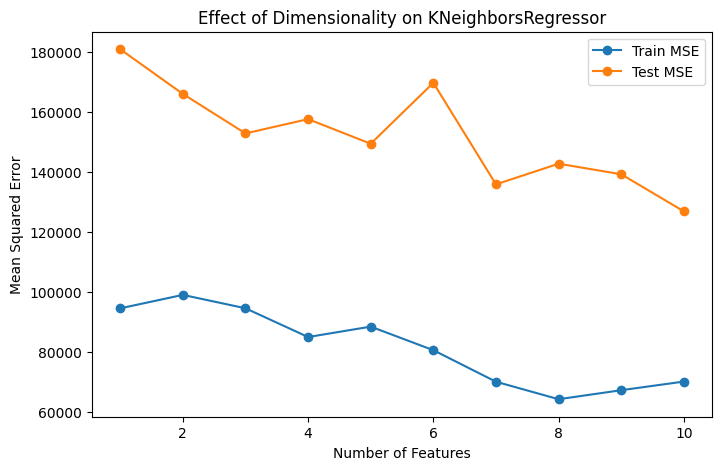

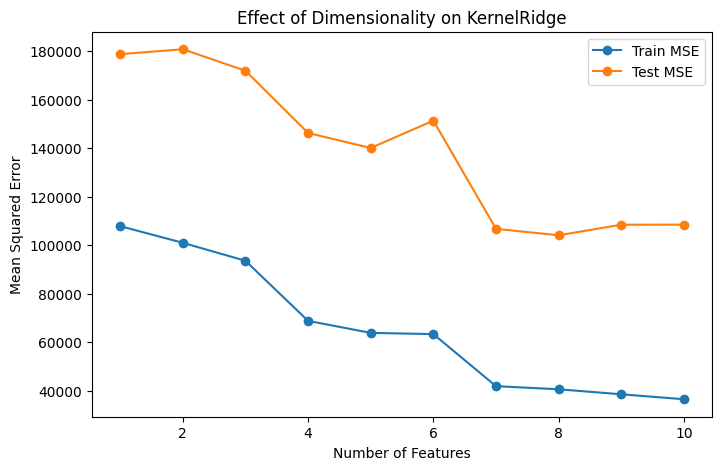

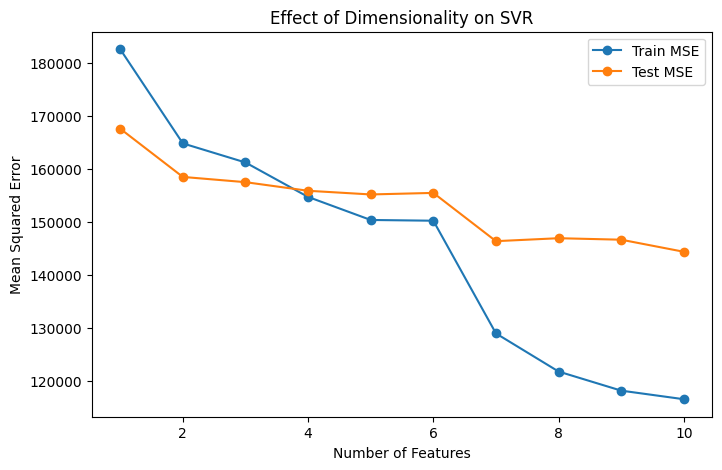

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

def plot_dimensionality_effect(model, X_train, y_train, X_test, y_test, max_features=10):
    train_mse_list = []
    test_mse_list = []
    
    for k in range(1, max_features+1):
        selector = SelectKBest(f_regression, k=k)
        X_train_k = selector.fit_transform(X_train, y_train)
        X_test_k = selector.transform(X_test)
        
        model.fit(X_train_k, y_train)
        y_train_pred = model.predict(X_train_k)
        y_test_pred = model.predict(X_test_k)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_features+1), train_mse_list, label='Train MSE', marker='o')
    plt.plot(range(1, max_features+1), test_mse_list, label='Test MSE', marker='o')
    plt.title(f'Effect of Dimensionality on {model.__class__.__name__}')
    plt.xlabel('Number of Features')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

plot_dimensionality_effect(mlp_best, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
plot_dimensionality_effect(knn_best, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
plot_dimensionality_effect(krr_best, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)
plot_dimensionality_effect(svr_best, X_train_scaled_fresh, y_train_fresh, X_test_scaled_fresh, y_test_fresh)